/home/digitalopt/proj/depth_estimation


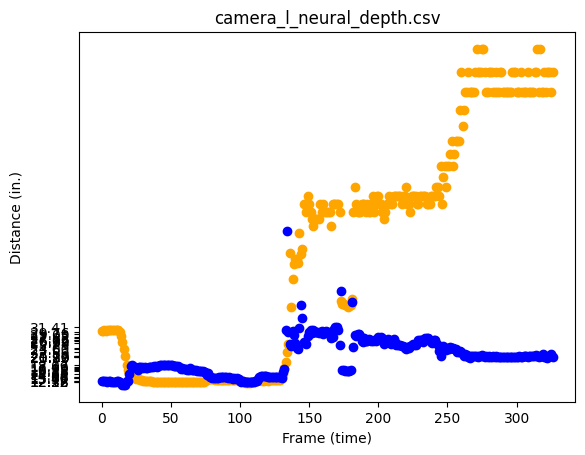

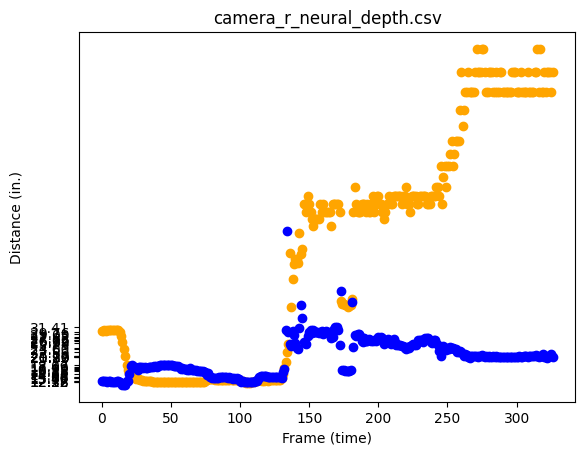

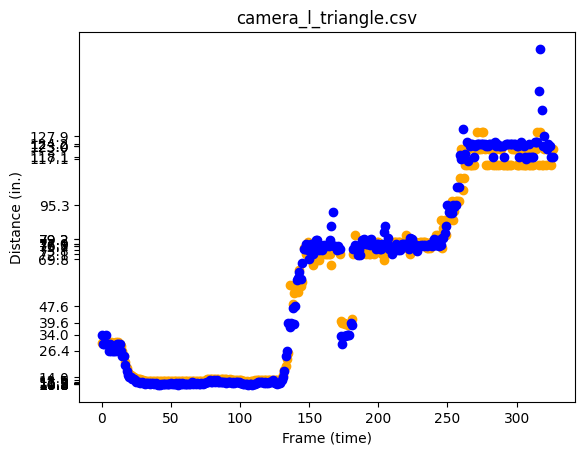

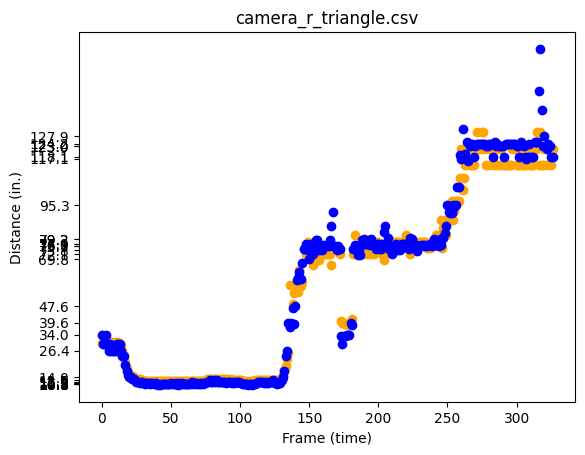

In [18]:
import matplotlib.pyplot as plt
import csv
import os
from math import sqrt
import numpy as np

print(os.getcwd())
files = ['gt_gt.csv', 'camera_l_neural_depth.csv', 'camera_r_neural_depth.csv', 'camera_l_triangle.csv', 'camera_r_triangle.csv']

def rmse(y, yhat):
    errors = list(map(lambda x: (x[0] - x[1])**2, zip(y, yhat)))
    return sqrt((sum(errors)/ len(errors)))

def depth_2_dist(y, yhat):
    '''
    given dataset of relative inverse depths and gt_depths (cm),
    finds a linear relationship in form pred = mx + b
    returns absolute depth (cm).
    '''
    # invert gt to get inverse depth
    gt = list(map(lambda x: 1/x, y))
    # align prediction based on least squares estimates
    A = np.vstack([gt, np.ones(len(gt))]).T
    m, b = np.linalg.lstsq(A, yhat, rcond=None)[0]
    # transform relative inverse depth to absolute depth
    return [i * m + b for i in yhat]

reader = csv.reader
data = []
for n in files:
    p = './results/' + n
    with open(p) as f:
        reader = csv.reader(f)
        for idx, row in enumerate(reader):
            if idx == 1:
                if n.split('_')[-1] == 'depth.csv':
                    row = list(map(lambda x: round(float(x) * 2.54, 2), row))
                    data.append(row) 
                else:
                    row = list(map(lambda x: round(float(x), 2), row))
                    data.append(row)
xvals = [i for i in range(len(data[0]))]

colors = [i for i in range(len(data))]
gt = data[0]
for idx, dset in enumerate(data[1:]):
    # print(len(gt), len(dset))
    if idx < 2:
        dset = [1000 / x for x in dset]
    #     dset = depth_2_dist(gt, dset)
    plt.scatter(xvals, gt, c='orange')
    plt.scatter(xvals, dset, c='blue')
    plt.yticks(dset[::10])
    plt.title(files[idx+1])
    plt.xlabel('Frame (time)')
    plt.ylabel('Distance (in.)')
    # plt.legend((gt, dat), ('gt', files[idx+1]))
    plt.show()

